# Quick Start
## Tensor-based Graphs
### Graphs
Graphs are the fundamental data structure used in TorchDrug. They can be viewed as a generalization of graph processing libraries (e.g., NetworkX) in a tensor framework, while enjoy the GPU acceleration and auto differentiation.

D:\anaconda\envs\d2l\lib\site-packages\torchdrug\data\graph.py:1032: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


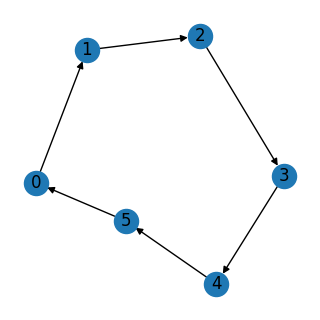

In [1]:
import torchdrug as td
from torchdrug import data
%matplotlib inline

edge_list = [[0, 1], [1, 2], [2, 3], [3, 4], [4, 5], [5, 0]]
graph = data.Graph(edge_list, num_node=6)
graph.visualize()

torch.Size([6, 67])
torch.Size([12, 18])


D:\anaconda\envs\d2l\lib\site-packages\torchdrug\data\molecule.py:586: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


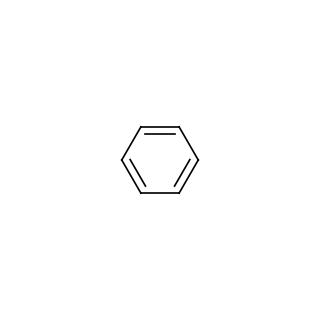

In [2]:
mol = data.Molecule.from_smiles("C1=CC=CC=C1")
mol.visualize()
print(mol.node_feature.shape)
print(mol.edge_feature.shape)

D:\anaconda\envs\d2l\lib\site-packages\torchdrug\data\molecule.py:1031: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


PackedMolecule(batch_size=4, num_atoms=[12, 6, 14, 9], num_bonds=[22, 10, 30, 18], device='cuda:0')


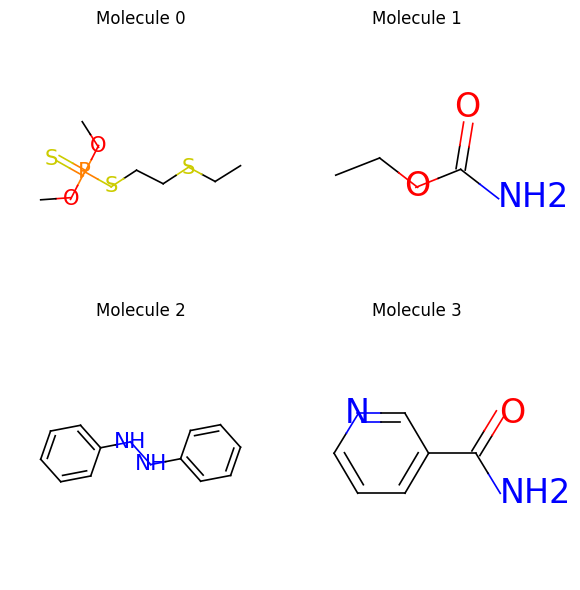

In [3]:
smiles_list = ["CCSCCSP(=S)(OC)OC", "CCOC(=O)N",
               "N(Nc1ccccc1)c2ccccc2", "NC(=O)c1cccnc1"]
mols = data.PackedMolecule.from_smiles(smiles_list)
mols.visualize()
mols = mols.cuda()
print(mols)

The following example shows how to select edges that contain at least one carbon

D:\anaconda\envs\d2l\lib\site-packages\torchdrug\data\molecule.py:1031: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


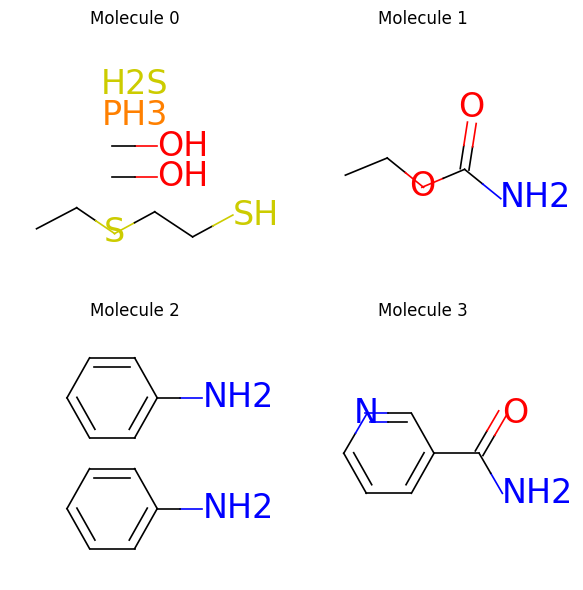

In [5]:
node_in, node_out, bond_type = mols.edge_list.t()
edge_mask = (mols.atom_type[node_in] == td.CARBON) | \
            (mols.atom_type[node_out] == td.CARBON)
mols = mols.edge_mask(edge_mask)
mols.visualize()